# Wine Binary Classification

Import the white wine quality data into a `DataFrame` (this is different than the red wine data we worked with previously).

Perform the following tasks:

1. Analyze the data

2. In a new column called `binary`, map any `quality` less than or equal to `6` as `0` and greater than `6` as `1`

3. Choose all or some features to train on

4. Perform a logistic regression using a train/test split

5. Calculate the `accuracy_score`, `precision_score`, and `recall_score` on the test dataset.  

6. Contemplate and document what a higher precision versus a higher recall will achieve in this example. If we want to set a higher bar for "high quality wine" (a predicted value of `1`), which do we prioritize? What could we do to try and balance the two metrics?

7. Perform steps 3-5 but using a cross-validation, and test other combinations of features to see the three metrics. Try passing 'accuracy', 'specificity', and 'recall' as scoring metrics in separate runs.

8. Is the data imbalanced? If so, enable the commented code below to have the number of `0` records equal to the number of `1` records. Then re-run the notebook and study the results.

In [1]:
# manipulations 
import pandas as pd
import numpy as np
#stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression


#visuals
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/winequality-white.csv')
df

""" # balance the data
balanced_0 = df[df["binary"] == 0].sample(1060)
balanced_1 = df[df["binary"] == 1]

balanced_df = pd.concat([balanced_0, balanced_1])
df = balanced_df
"""

' # balance the data\nbalanced_0 = df[df["binary"] == 0].sample(1060)\nbalanced_1 = df[df["binary"] == 1]\n\nbalanced_df = pd.concat([balanced_0, balanced_1])\ndf = balanced_df\n'

# 1. Analyze the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: >

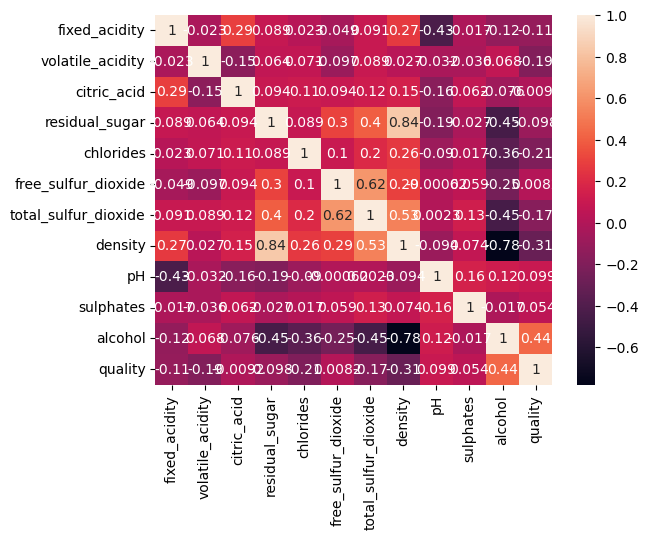

In [5]:
sns.heatmap(df.corr(), annot=True)

## 2. Map `binary` column

Add a `binary` column that makes the wine quality binary, where 6 or less being `0` and more than 6 being `1`.

In [6]:
# df['binary'] = df['quality'].map({3:0, 4:0,5:0, 6:0, 7:1, 8:1,9:1})

In [7]:
# Add a binary column based on wine quality
df['binary'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)


In [8]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [9]:
df.groupby(['binary']).count()['density']

binary
0    3838
1    1060
Name: density, dtype: int64

In [10]:
df.binary.value_counts()

binary
0    3838
1    1060
Name: count, dtype: int64

## 3. Choose All or Some Features to Train On

In [11]:
features = ['alcohol', 'density', 'total_sulfur_dioxide'] # ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar",
           # "chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density",
           # "pH","sulphates","alcohol"]
        
        

In [12]:
X = df[features]

In [13]:
y = df.binary

## 4. Perform a Logistic Regression with a Train/Test Split

In [14]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [15]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)


LogisticRegression(C=1000000000.0)

## 5. Calculate Accuracy, Precision, and Recall

In [16]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.803265306122449


In [17]:
metrics.precision_score(y_test, y_pred_class)

0.6

In [18]:
metrics.recall_score(y_test, y_pred_class)

0.2509505703422053

## 6. Contemplate Scores


Presicion can be seen as a measure of quality, and recall as a measure of quantity. A higher precision will have a higher correct prediction rate of quality wines, while a higher recall will capture more high quality wines but also falsey label more low quality wines as high quality.

If we want our high quality wine threshold to be higher, we want a higher presion. we could balance these two metrics bu moving the threshold in our logistic regression to classify on a boundry other than 50%, try other features, and utilize cross valization to deal with vairiance.  

## 7. Utilize Cross-Validation with Other Features

In [19]:
features = ['alcohol']
y = df.binary

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='recall')
print (scores.mean())

0.23584905660377356


In [22]:
print (np.sqrt(-cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

0.45250141949848455


## 8. Is the Data Imbalanced?

In [23]:
df.binary.value_counts()

binary
0    3838
1    1060
Name: count, dtype: int64

Yes there are more false values than true for binary. False is over represented.  

Can balance and remove false values so its 1060 and 1060. Even outcomes. Use random() to pick random values from false 

In [24]:
from sklearn.metrics import classification_report

In [25]:

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       962
           1       0.60      0.25      0.35       263

    accuracy                           0.80      1225
   macro avg       0.71      0.60      0.62      1225
weighted avg       0.78      0.80      0.77      1225



In [26]:
df.binary.value_counts(normalize=True)

binary
0    0.783585
1    0.216415
Name: proportion, dtype: float64